In [ ]:
## Executive Summary: Topic Modeling of McDonald’s Customer Reviews

This project aimed to extract meaningful insights from McDonald's customer reviews using Natural Language Processing (NLP) and topic modeling techniques. The primary goal was to observe common themes in customer feedback that can inform business decisions related to service quality, customer satisfaction, and operational improvements.

### Objectives
- Analyze textual reviews of McDonald’s locations to identify recurring topics.
- Compare different topic modeling approaches (LDA and NMF).
- Recommend the most interpretable and actionable model for real-world application.

### Methodology
- **Data Preparation**: Preprocessed reviews by removing noise, tokenizing, lemmatizing, and filtering stopwords.
- **Modeling**: Applied two topic modeling algorithms:
  - **Latent Dirichlet Allocation (LDA)** with 6 topics.
  - **Non-negative Matrix Factorization (NMF)** with 7 topics.
- **Evaluation**: Compared both models based on coherence, topic interpretability, and business relevance.

### Key Findings
- The **LDA model with 6 topics** provided the most coherent and distinguishable themes:
  1. **Drive-Thru Experience** (wait times, opening hours)
  2. **Positive Feedback** (good food, friendly staff)
  3. **Order Delays and Complaints** (slow service, miscommunication)
  4. **Food Items and Preferences** (fries, chicken, sandwiches)
  5. **Negative Experiences** (rude staff, bad service)
  6. **Brand and Family Environment** (mentions of McDonald’s brand, kids, area)

- The NMF model, while reasonably structured, showed more topic overlap and less distinct segmentation, making LDA a more practical choice.

### Conclusion
The LDA model successfully uncovered six dominant themes in customer reviews that can guide improvements in:
- Drive-thru operations
- Customer service training
- Product consistency and quality control

These insights offer actionable direction for enhancing customer experience and maintaining McDonald’s brand reputation.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import numpy
import matplotlib
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn
import sklearn
import gensim
from gensim import corpora
import pandas
# initialize the spacy engine
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

### Loading the data

In [2]:
# load the dataset
import pandas as pd

# Try reading with latin1 encoding
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin1')
print(df.head())


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                         

## 🧹 Data Preprocessing

A robust preprocessing was implemented to ensure the dataset was clean, consistent, and well-structured for topic modeling. The key steps include:

### Column Selection
Only the most relevant features were selected for analysis:
- **Review** – the primary text field used for topic modeling.

All other columns were excluded to streamline the dataset and reduce noise.


### Duplicate Removal
Duplicate service request records were identified and removed to avoid biasing the model with repeated entries of same problem by different people.

### Null values removal
Null reviews were removed to ensure consistency in columns, and proper working of the model.


### Text Cleaning and Normalization
The `review` column went under the following NLP cleaning steps:
- Lowercasing of text
- Removal of punctuation, digits, and special characters
- Elimination of English stopwords to reduce irrelevant noise

### Lemmatization
Words were reduced to their base or dictionary form using lemmatization (e.g., “running” → “run”).

In [3]:
# keep only 'review' and 'rating' columns
df = df[['review']]

# Check the first few rows
print(df.head())

                                              review
0  Why does it look like someone spit on my food?...
1  It'd McDonalds. It is what it is as far as the...
2  Made a mobile order got to the speaker and che...
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4  I repeat my order 3 times in the drive thru, a...


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# check for duplicates
duplicates = df.duplicated(subset=['review']).sum()
print(f"Duplicate rows: {duplicates}")

# drop duplicate reviews
df = df.drop_duplicates(subset=['review'])

# verify
print("After cleanup:")
print(df.isnull().sum())
print(f"DataFrame shape after removing missing and duplicates: {df.shape}")


Duplicate rows: 11111
After cleanup:
review    0
dtype: int64
DataFrame shape after removing missing and duplicates: (22285, 1)


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print(df.isnull().sum())

review    0
dtype: int64


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Text cleaning and Normalization
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\n|\r', ' ', text)  # Remove newlines
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['cleaned_text'] = df['review'].apply(clean_text)

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Lemmatization 
def lemmatize_and_filter(text):
    # Apply spaCy NLP processing
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha and len(token) > 2]
    return ' '.join(tokens)

# Apply lemmatization and filtering on the 'cleaned_text' column
df['processed_text'] = df['cleaned_text'].apply(lemmatize_and_filter)

# drop the cleaned_txt column
df = df.drop(columns=['cleaned_text'])
# fill missing values with empty string first
df['processed_text'] = df['processed_text'].fillna('')

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
df = df[['processed_text']]
print(df.head())

                                      processed_text
0  look like someone spit food normal transaction...
1  mcdonald far food atmosphere staff make differ...
2  make mobile order get speaker check line move ...
3     crispy chicken sandwich customer service quick
4  repeat order time drive thru still manage mess...


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Save and load the pre-processed file for modelling

In [9]:
df.to_csv('mcdonalds_reviews_cleaned.csv', index=False)

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# load the file
df = pd.read_csv('mcdonalds_reviews_cleaned.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22285 entries, 0 to 22284
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   processed_text  22106 non-null  object
dtypes: object(1)
memory usage: 174.2+ KB


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df = df.dropna(subset=['processed_text'])


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Modelling

## LDA

In [26]:


# define the range for topics
topics_range = range(4, 10)

# vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(analyzer="word", max_df=0.5, min_df=15, max_features=5000)
clean_vec = vectorizer.fit_transform(df['processed_text'])

# get features names
feature_names = vectorizer.get_feature_names()

# loop through the range of topics
for num_topics in topics_range:
    print(f"\n--- LDA Model with {num_topics} Topics ---")
    
    # Build the LDA model
    lda_model = LatentDirichletAllocation(
        n_components=num_topics,
        random_state=100,
        learning_method='batch'
    )
    lda_model.fit(clean_vec)

    # Print the topics with words
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-11:-1]  # Top 10 words
        top_words = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]
        word_weight_str = " + ".join([f'{weight:.3f}*"{word}"' for word, weight in zip(top_words, top_weights)])
        print(f"Topic {topic_idx}: {word_weight_str}")




C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- LDA Model with 4 Topics ---
Topic 0: 1662.826*"drive" + 1573.417*"fry" + 1136.622*"thru" + 1067.382*"get" + 778.440*"burger" + 753.673*"order" + 643.240*"open" + 639.453*"time" + 608.361*"hour" + 607.450*"mcdonald"
Topic 1: 3689.203*"good" + 3676.706*"service" + 3304.861*"food" + 2181.082*"fast" + 1706.301*"great" + 1238.423*"clean" + 1130.504*"friendly" + 1120.780*"place" + 1114.858*"staff" + 1082.994*"always"
Topic 2: 2471.720*"mcdonald" + 1116.698*"place" + 928.222*"food" + 829.275*"like" + 649.108*"area" + 615.092*"one" + 594.234*"eat" + 575.020*"clean" + 569.257*"table" + 549.564*"get"
Topic 3: 5655.889*"order" + 2826.326*"get" + 1848.783*"wait" + 1613.512*"take" + 1509.026*"food" + 1497.493*"time" + 1441.675*"ask" + 1379.549*"give" + 1276.808*"manager" + 1259.235*"say"

--- LDA Model with 5 Topics ---
Topic 0: 2056.671*"drive" + 1308.523*"thru" + 902.939*"wait" + 713.615*"hour" + 678.216*"time" + 674.575*"close" + 671.441*"open" + 664.854*"long" + 640.836*"slow" + 635.709*"l

### LDA with 4 Topics:
- Topic 0: Drive-thru experience.

- Topic 1: Positive service, good food, fast, friendly.

- Topic 2: McDonald's, food, area, eating, clean, table.

- Topic 3: Issues with orders, wait time, manager interactions.

### LDA Model with 5 Topics:

- Topic 1: drive thru wait time.

- Topic 2: Positive feedback on service, food, and McDonald's.

- Topic 3: About place and area, but contain words like kid, one, lot.

- Topic 4: Discussion about waiting times, orders, and customer service.

- Topic 5: Complaints about bad experiences, especially related to cold food.


### LDA Model with 6 Topics:
- Topic 0: Drive-thru service, waiting times, hours of operation.

- Topic 1: Good food and service, fast, friendly staff.

- Topic 2: McDonald's, food, kids, ice cream.

- Topic 3: Order delays, wait times, interactions with staff.

- Topic 4: Food order include chicken sandwich and coffee.

- Topic 5: Bad service, rude staff, slow experiences.

### LDA Model with 7 Topics:
- Topic 0: Drive-thru, waiting times, open and close hours.

- Topic 1: Positive experiences, fast food, friendly service.

- Topic 2: long wait time order food.

- Topic 3: same issues with orders, wait times, manager interactions.

- Topic 4: Food quality, cold meals, customer complaints.

- Topic 5: Poor service, slow, rude interactions.

- Topic 6: Positive reviews about McDonald's, love for the brand.

### LDA Model with 8 Topics:
- Topic 0: Drive-thru, waiting times, restaurant hours.

- Topic 1: Issues like homelessness, dirty bathrooms.

- Topic 2: Orders, wait times, food quality.

- Topic 3: Customer service, manager interactions, complaints.

- Topic 4: Negative experiences, cold food, customer service complaints.

- Topic 5: Poor service, slow, rude interactions.

- Topic 6: McDonald's, positive reviews, food quality.

- Topic 7: Excellent service, fast food, friendly staff.


These were my topic distributions for different number of topics. Topics greater than six contained redundancy issues, escpecially about service being good. While the topics less than 6 were too small to cover the different topics in the reviews.

### T-sne plot for different number of topics
- 1. Seven topics distribution
- 2. Five topics distribution
- 3. Four topics distribution
- 1. Six topics distribution

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\manifold\_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To 

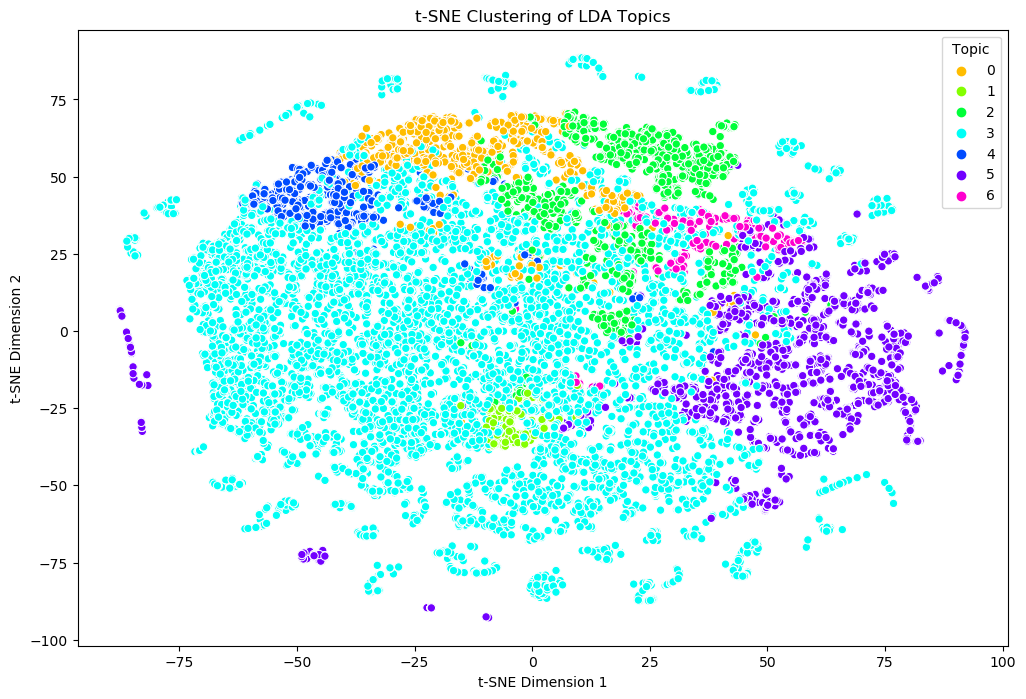

In [34]:
# Get topic distributions for each document
topic_distributions = []
for doc_topics in lda_model[corpus]:
    topic_probs = [0] * lda_model.num_topics
    for topic_num, prob in doc_topics[0]:
        topic_probs[topic_num] = prob
    topic_distributions.append(topic_probs)

# Convert to numpy array
topic_distributions = np.array(topic_distributions)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_values = tsne_model.fit_transform(topic_distributions)

# Get dominant topic for each document
dominant_topics = np.argmax(topic_distributions, axis=1)

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", lda_model.num_topics)
sns.scatterplot(x=tsne_values[:, 0], y=tsne_values[:, 1],
                hue=dominant_topics,
                palette=palette,
                legend='full')

plt.title("t-SNE Clustering of LDA Topics")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Topic", loc='best')
plt.show()

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\manifold\_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To 

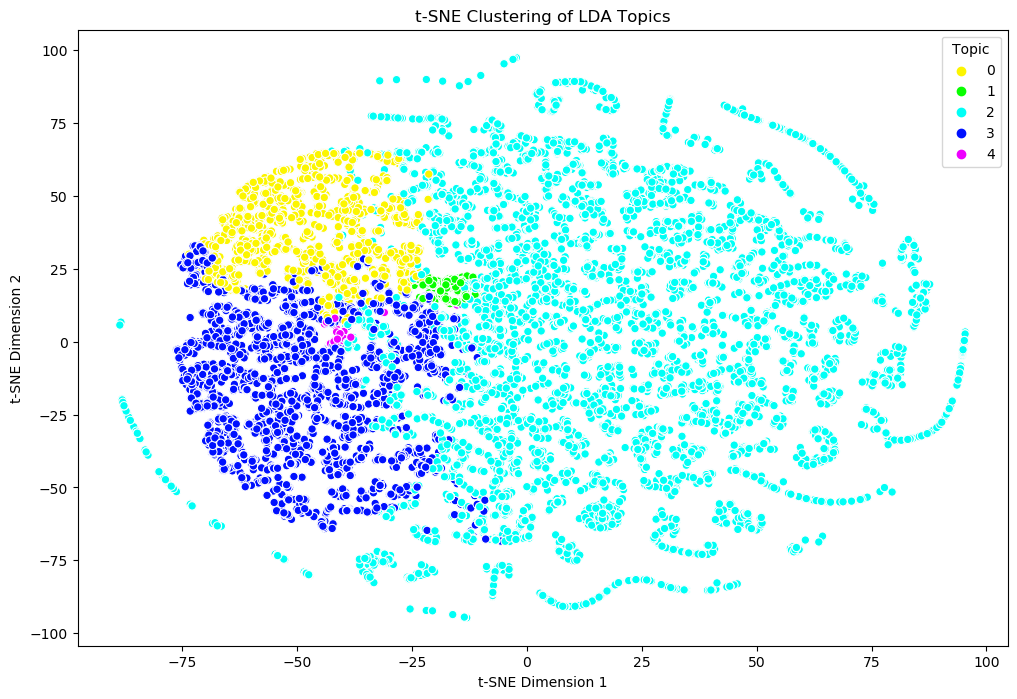

In [32]:
# Get topic distributions for each document
topic_distributions = []
for doc_topics in lda_model[corpus]:
    topic_probs = [0] * lda_model.num_topics
    for topic_num, prob in doc_topics[0]:
        topic_probs[topic_num] = prob
    topic_distributions.append(topic_probs)

# Convert to numpy array
topic_distributions = np.array(topic_distributions)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_values = tsne_model.fit_transform(topic_distributions)

# Get dominant topic for each document
dominant_topics = np.argmax(topic_distributions, axis=1)

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", lda_model.num_topics)
sns.scatterplot(x=tsne_values[:, 0], y=tsne_values[:, 1],
                hue=dominant_topics,
                palette=palette,
                legend='full')

plt.title("t-SNE Clustering of LDA Topics")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Topic", loc='best')
plt.show()

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\manifold\_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To 

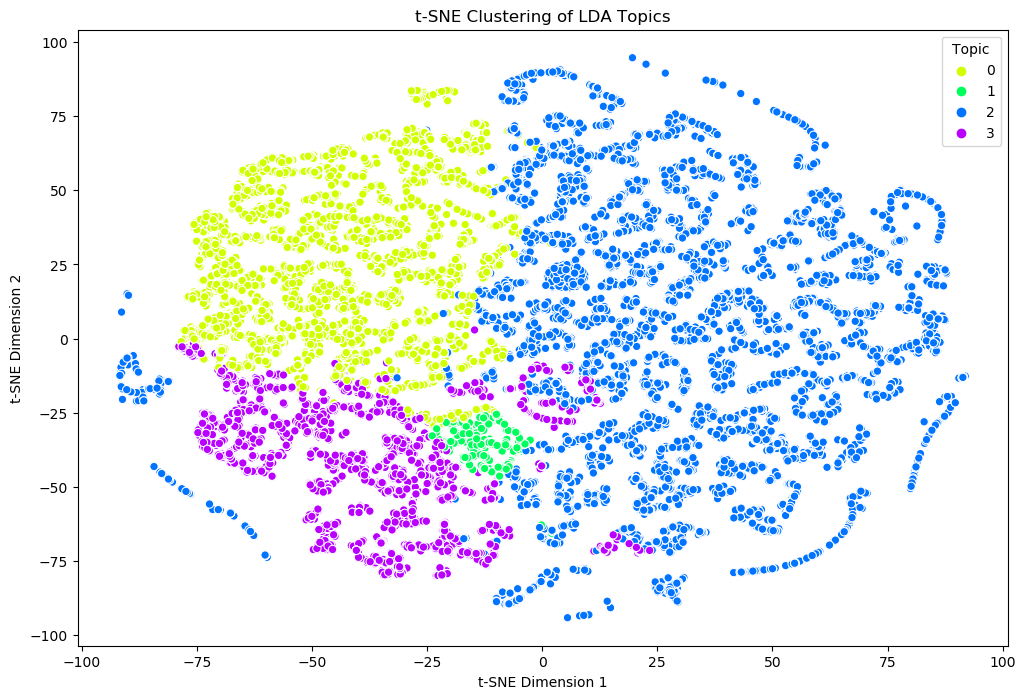

In [30]:
# Get topic distributions for each document
topic_distributions = []
for doc_topics in lda_model[corpus]:
    topic_probs = [0] * lda_model.num_topics
    for topic_num, prob in doc_topics[0]:
        topic_probs[topic_num] = prob
    topic_distributions.append(topic_probs)

# Convert to numpy array
topic_distributions = np.array(topic_distributions)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_values = tsne_model.fit_transform(topic_distributions)

# Get dominant topic for each document
dominant_topics = np.argmax(topic_distributions, axis=1)

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", lda_model.num_topics)
sns.scatterplot(x=tsne_values[:, 0], y=tsne_values[:, 1],
                hue=dominant_topics,
                palette=palette,
                legend='full')

plt.title("t-SNE Clustering of LDA Topics")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Topic", loc='best')
plt.show()

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\seaborn\rcmod.py:9: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= '1.5.0'
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\seaborn\rcmod.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_2 = LooseVersion(mpl.__versi

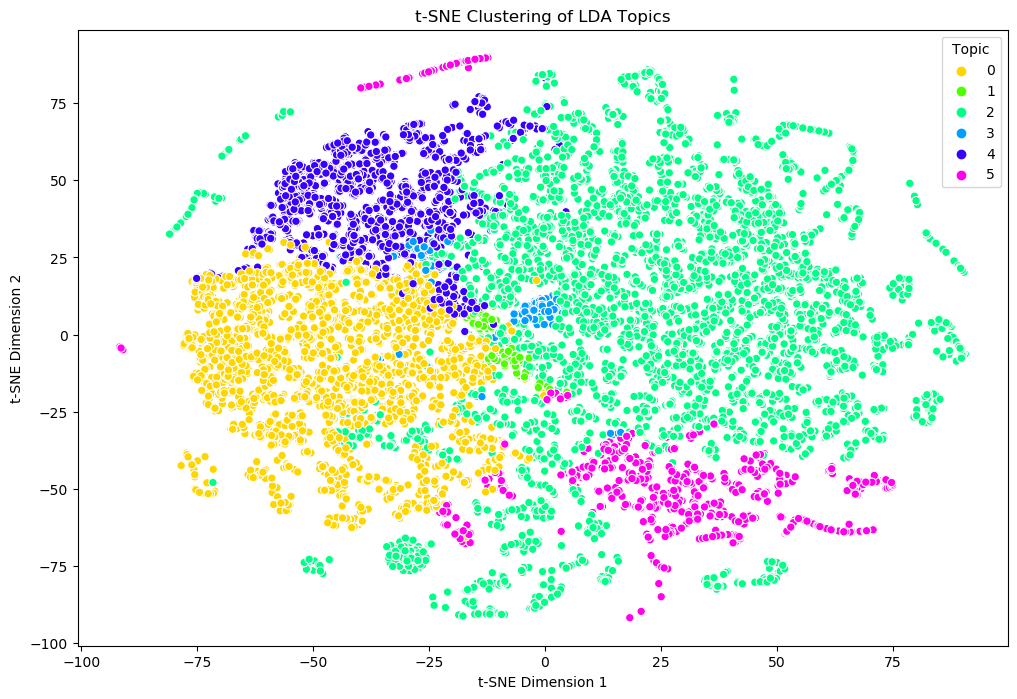

In [28]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Get topic distributions for each document
topic_distributions = []
for doc_topics in lda_model[corpus]:
    topic_probs = [0] * lda_model.num_topics
    for topic_num, prob in doc_topics[0]:
        topic_probs[topic_num] = prob
    topic_distributions.append(topic_probs)

# Convert to numpy array
topic_distributions = np.array(topic_distributions)

# Apply t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_values = tsne_model.fit_transform(topic_distributions)

# Get dominant topic for each document
dominant_topics = np.argmax(topic_distributions, axis=1)

# Plot
plt.figure(figsize=(12, 8))
palette = sns.color_palette("hsv", lda_model.num_topics)
sns.scatterplot(x=tsne_values[:, 0], y=tsne_values[:, 1],
                hue=dominant_topics,
                palette=palette,
                legend='full')

plt.title("t-SNE Clustering of LDA Topics")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Topic", loc='best')
plt.show()



- Based on above plot, The ideal number of topics should be six, as the visualization is pretty clear, and one topic is not dominating the whole scenerio.


### pyLDavis visual with number of topics as 6

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(
    n_components=6,
    random_state=100,
    learning_method='batch'
)
lda_model.fit(clean_vec) 


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

lda_vis = pyLDAvis.sklearn.prepare(lda_model, clean_vec, vectorizer, R=10)
pyLDAvis.display(lda_vis)


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


## NMF

In [42]:
vectorizer2 = sklearn.feature_extraction.text.TfidfVectorizer(
    analyzer="word",
    max_df=0.5, 
    min_df=20, 
    max_features=number_features,
    smooth_idf=False
)
clean_vec2 = vectorizer2.fit_transform(df["processed_text"])
print(clean_vec2[0])

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  (0, 90)	0.2066508199651245
  (0, 209)	0.19275626408767907
  (0, 1104)	0.2636624874827417
  (0, 1131)	0.24882831419684784
  (0, 1173)	0.23235310880440668
  (0, 341)	0.19865216950910827
  (0, 1224)	0.21321981500629747
  (0, 848)	0.30174801033330634
  (0, 188)	0.40184441120808423
  (0, 372)	0.2831378417607228
  (0, 756)	0.31450577753424597
  (0, 437)	0.2457602945625212
  (0, 1038)	0.2739102628323427
  (0, 623)	0.17469090472381174
  (0, 639)	0.22856093742767344


In [45]:
feature_names_vec2 = vectorizer2.get_feature_names()
unique_words = set(feature_names_vec2)
print(len(unique_words)) 



1279


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Define a function to fit NMF for a given number of topics and display top words
def fit_nmf_and_display_topics(n_topics, vectorizer, clean_vec2):
    nmf = NMF(
        n_components=n_topics,
        init='nndsvda',
        solver='mu',
        beta_loss='frobenius',
        random_state=0,
        alpha=0.1,
        l1_ratio=0.5
    )
    nmf.fit(clean_vec2)

    print(f"Reconstruction Error (n_topics={n_topics}): {nmf.reconstruction_err_:.4f}")

    W = nmf.components_

    feature_names_vec2 = vectorizer.get_feature_names()

    print(f"\nTop words for n_topics={n_topics}:")
    display_top_words(W, feature_names_vec2, n_words=10)

for n_topics in range(4, 9): 
    fit_nmf_and_display_topics(n_topics, vectorizer2, clean_vec2)
    print("="*50)


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reconstruction Error (n_topics=4): 141.6661

Top words for n_topics=4:
Topic 1:
good, food, place, mcdonald, always, service, price, coffee, quick, breakfast

Topic 2:
order, mcdonald, get, wait, time, drive, take, place, bad, thru

Topic 3:
service, great, customer, slow, bad, quick, clean, friendly, excellent, staff

Topic 4:
fast, food, fresh, hot, friendly, clean, always, staff, cold, nice

Reconstruction Error (n_topics=5): 140.7511

Top words for n_topics=5:
Topic 1:
good, food, place, always, service, price, coffee, fry, breakfast, quick

Topic 2:
order, get, wait, drive, time, take, thru, minute, place, long

Topic 3:
service, great, customer, slow, bad, quick, clean, friendly, excellent, staff

Topic 4:
fast, food, fresh, hot, friendly, clean, always, staff, cold, nice

Topic 5:
mcdonald, love, like, ever, bad, clean, expect, one, nice, well

Reconstruction Error (n_topics=6): 139.9093

Top words for n_topics=6:
Topic 1:
good, food, place, always, price, service, coffee, fry, 

## Selection of Optimal Number of Topics

### Reconstruction Error
- **4 topics**: 141.6661
- **5 topics**: 140.7511
- **6 topics**: 139.9093
- **7 topics**: 139.0660
- **8 topics**: 138.4072

The reconstruction error decreases as the number of topics increases, but the improvement becomes marginal after 7 topics.

### Topic Interpretability
- **4 topics**: Topics are broader and overlap more.
- **5 topics**: Slightly more refined topics, better separation of customer service and order-related issues.
- **6 topics**: Good balance between general and specific topics. Topics like "fast food," "service issues," and "mcdonald's experience" are clearly separated.
- **7 topics**: Even better separation. Specific aspects such as "cleanliness," "restaurant atmosphere," and "bad experiences" are distinctly captured.
- **8 topics**: Very granular, but some topics become nuanced and start to overlap.

### Conclusion
- **6 topics** offer a good balance between interpretability and reconstruction error, providing clearly separated and meaningful topics.
- **7 topics** offer slightly better separation but at the cost of increased complexity.

**Chosen Number of Topics**:  
**7 topics** (for best seperation)

---


In [55]:
# Define and fit NMF model with 6 topics
nmf = NMF(
    n_components=7,
    init='nndsvda',
    solver='mu',
    beta_loss='frobenius',
    random_state=0,
    alpha=0.1,
    l1_ratio=0.5
)
nmf.fit(clean_vec2)



nmf_transform = nmf.transform(clean_vec2)
print(nmf_transform.shape)
print(nmf_transform)

C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(22106, 7)
[[4.63450039e-004 1.33947420e-002 8.01683819e-037 ... 2.95738160e-003
  1.07271793e-004 3.10130198e-004]
 [1.04326455e-003 6.28421433e-003 2.38561256e-007 ... 1.65216891e-002
  1.74411270e-003 2.16566564e-002]
 [9.73858261e-018 3.74170716e-002 2.86197560e-022 ... 3.15852055e-009
  1.55644761e-013 1.54167172e-017]
 ...
 [5.00285306e-019 4.11259028e-004 5.41486107e-089 ... 5.35461038e-015
  1.88443674e-188 7.58789675e-010]
 [2.65973640e-002 5.08737046e-018 9.29713074e-057 ... 2.71884210e-012
  7.36544859e-043 5.46631002e-025]
 [4.80894648e-002 1.00537851e-002 9.14792885e-020 ... 4.08151094e-024
  1.61815759e-033 4.12824388e-018]]


C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\neighbors\_base.py:650: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(joblib.__version__) < LooseVersion('0.12'))
C:\Users\gillg\anaconda3\envs\UL\lib\site-packages\sklearn\manifold\_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To 

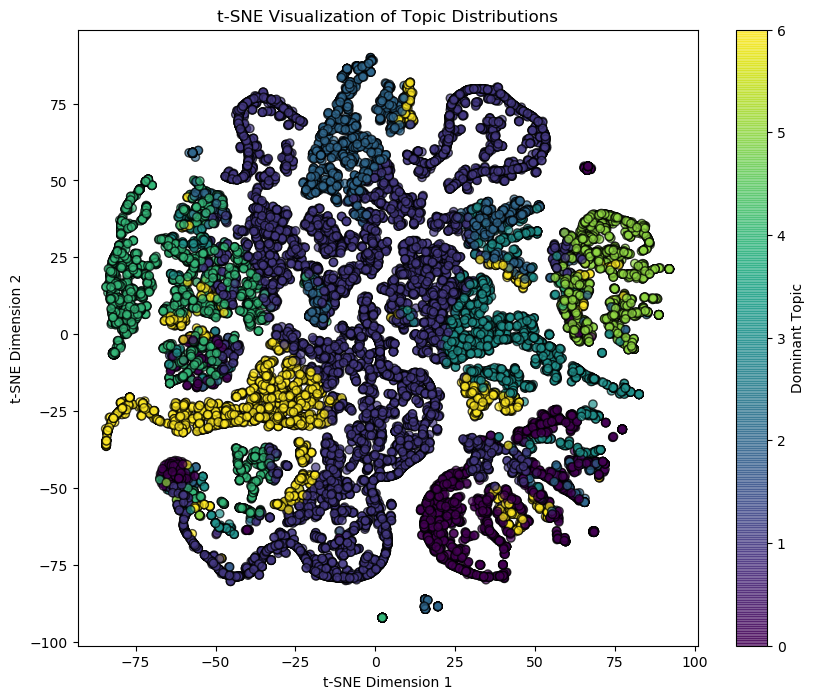

In [56]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE on the transformed matrix (document-topic matrix)
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(nmf_transform)

# Find the dominant topic for each document
dominant_topic = np.argmax(nmf_transform, axis=1)

# Plot the t-SNE results with colors representing the dominant topic
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dominant_topic, cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label="Dominant Topic")
plt.title("t-SNE Visualization of Topic Distributions")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()



## Final Model Selection for Topic Modeling on McDonald's Reviews

After evaluating both models — **LDA with 6 topics** and **NMF with 7 topics** — the **6-topic LDA model** is selected as the final model. 

---

### 🔹 LDA Model with 6 Topics

**Advantages:**
- Strong and interpretable topics with high-weighted keywords.
- Clear separation
- Includes business-relevant detail like "burger", "coffee", "chicken", etc.

**Minor Drawbacks:**
- One topic (Topic 4) is slightly less focused but still interpretable.

---

### 🔹 NMF Model with 7 Topics

**Advantages:**
- Clean separation of topics like cleanliness, freshness, and order issues.

**Limitations:**
- Topics show slight overlap (e.g., Topic 1 and 6 both reflect general positivity).

---

### ✅ **Conclusion:**
The **LDA model with 6 topics** is better suited for this dataset due to:
- Higher interpretability
- Clear distinction between themes (service, order issues, food quality)
- Clear tsne plot, and less overlapping in pyLDavis visual.

So I am choosing LDA.

